<a href="https://colab.research.google.com/github/khushipathak/MTL782-files/blob/main/DM_proj1_finalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for Bank Marketing Classification project
Authors: Khushi Kalpesh Pathak [2018MT60783], Sakshi Manoj Bhandari [2018MT60792]

As part of our submission for MTL782 - Data Mining

## Initialization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import chi2_contingency

df = pd.read_csv("https://github.com/khushipathak/MTL782-files/blob/main/bank-additional-full.csv?raw=true", sep = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Printing basic summary statistics

df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


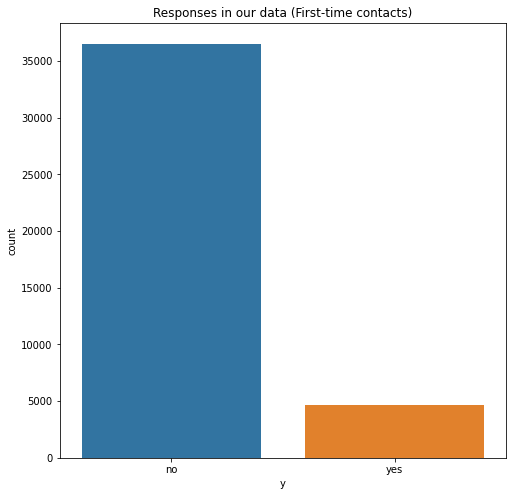

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot('y', data=df)
plt.title('Responses in our data (First-time contacts)')
plt.show()


## Exploratory Data Analysis
Let us take a look at the chi-squared test values to check whether or not a particular attribute is influential on the response.

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
significance = 0.01
p = 1 - significance

attr = ['age', 'job', 'education', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration', 'pdays']

df_chi = pd.DataFrame(index = ['𝜒2 value', 'p-value', 'Critical value', 'influential'], columns = attr)

for att in attr:
  contigency = pd.crosstab(df[att], df['y']) 
  chi2_result = chi2_contingency(contigency)
  dof = chi2_result[2]
  critical_value = chi2.ppf(p, dof)
  df_chi.at['𝜒2 value',att] = chi2_result[0]
  df_chi.at['p-value',att] = chi2_result[1]
  df_chi.at['Critical value',att] = critical_value
  df_chi.at['influential', att] = 'yes' if chi2_result[0]>critical_value else 'no'

df_chi

,age,job,education,marital,default,housing,loan,month,day_of_week,duration,pdays
𝜒2 value,1657.48,961.242,193.106,122.655,406.578,5.6845,1.09403,3101.15,26.1449,10460,4480.25
p-value,4.13735e-295,4.18976e-199,3.30519e-38,2.06801e-26,5.16196e-89,0.0582945,0.578675,0,2.95848e-05,0,0
Critical value,108.771,24.725,18.4753,11.3449,9.21034,9.21034,9.21034,21.666,13.2767,1675.17,45.6417
influential,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


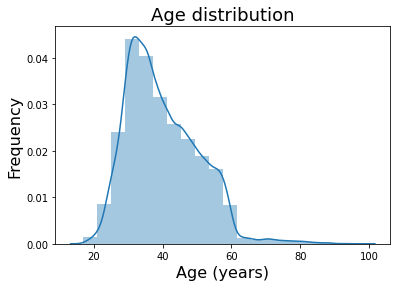

In [ ]:
sns.distplot(df['age'],bins=20)
plt.title('Age distribution', fontsize=18)
plt.xlabel('Age (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.savefig("age.png")

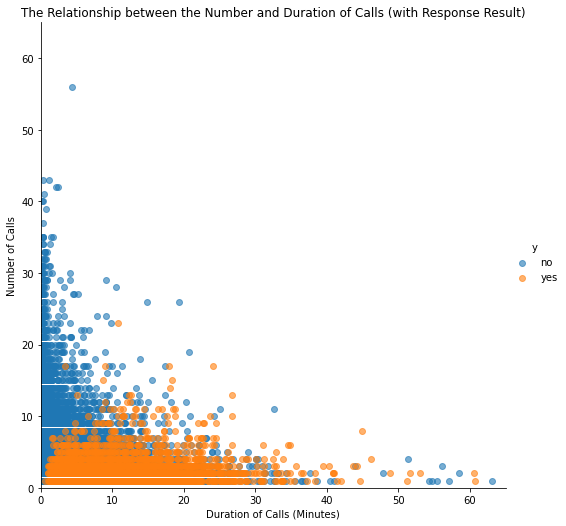

<Figure size 432x288 with 0 Axes>

In [ ]:
df_=df
df_['duration'] = df_['duration'].apply(lambda n:n/60).round(2)
dur_cam = sns.lmplot(x='duration', y='campaign',data = df_,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')
plt.show()
plt.savefig("dur-num.png")

#### Removing outliers and converting to numerical data:

In [ ]:
from scipy.stats import zscore
df_outliers_removed = df
df_outliers_removed['duration_outliers']= zscore(df_outliers_removed['duration'])
condition1 = (df_outliers_removed['duration_outliers']>3) | (df_outliers_removed['duration_outliers']<-3 )
df_outliers_removed = df_outliers_removed.drop(df_outliers_removed[condition1].index, axis = 0, inplace = False)

df_outliers_removed = df_outliers_removed.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_outliers'], axis = 1)
df_outliers_removed['job'] = df_outliers_removed['job'].map({'housemaid':0,'services':1,'admin.':2,'blue-collar':3,'technician':4,'retired':5,'management':6,'unemployed':7,'self-employed':8,'unknown':9,'entrepreneur':10,'student':11})
df_outliers_removed['marital'] = df_outliers_removed['marital'].map({'single':0,'married':1,'divorced.':2,'unknown':3})
df_outliers_removed['education'] = df_outliers_removed['education'].map({'basic.4y':0,'high.school':1,'basic.6y':2,'basic.9y':3,'professional.course':4,'unknown':5,'university.degree':6,'illiterate':7})
df_outliers_removed['default'] = df_outliers_removed['default'].map({'yes': 1, 'no': 0, 'unknown': 2})
df_outliers_removed['housing'] = df_outliers_removed['housing'].map({'yes': 1, 'no': 0, 'unknown': 2})
df_outliers_removed['loan'] = df_outliers_removed['loan'].map({'yes': 1, 'no': 0, 'unknown': 2})
df_outliers_removed['contact'] = df_outliers_removed['contact'].map({'cellular': 1, 'telephone': 0})
df_outliers_removed['month'] = df_outliers_removed['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df_outliers_removed['day_of_week'] = df_outliers_removed['day_of_week'].map({'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,})
df_outliers_removed['poutcome'] = df_outliers_removed['poutcome'].map({'success': 1, 'failure': 0, 'nonexistent': 2})
df_outliers_removed['y'] = df_outliers_removed['y'].map({'yes': 1, 'no': 0})
df_outliers_removed.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,40324.000000,40324.000000,35795.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000,40324.000000
mean,40.033925,3.672329,0.688420,3.278395,0.418039,0.572165,0.199360,0.634238,5.606587,1.977061,3.900840,2.566660,962.381857,0.174065,1.758903,0.102272
std,10.424739,2.453736,0.477052,2.185838,0.813181,0.541166,0.455721,0.481649,2.041535,1.411842,3.193806,2.778311,187.142487,0.497027,0.625057,0.303009
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.680000,1.000000,999.000000,0.000000,2.000000,0.000000
50%,38.000000,3.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,5.000000,2.000000,2.930000,2.000000,999.000000,0.000000,2.000000,0.000000
75%,47.000000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,7.000000,3.000000,5.080000,3.000000,999.000000,0.000000,2.000000,0.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,11.000000,4.000000,17.250000,56.000000,999.000000,7.000000,2.000000,1.000000


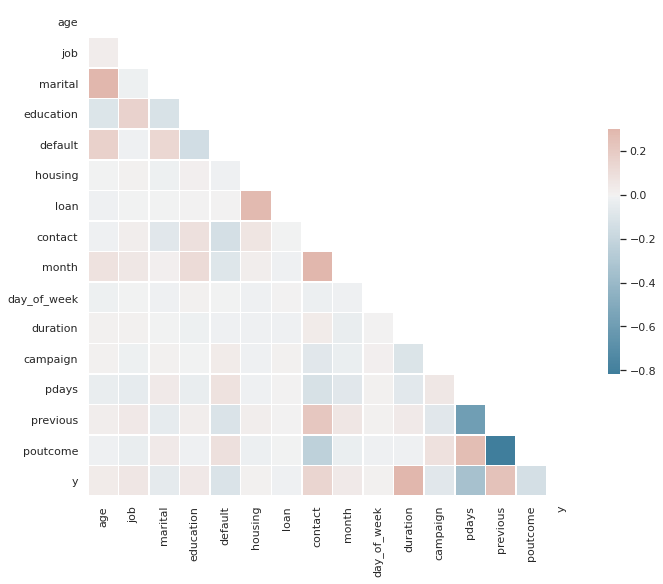

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = df_outliers_removed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


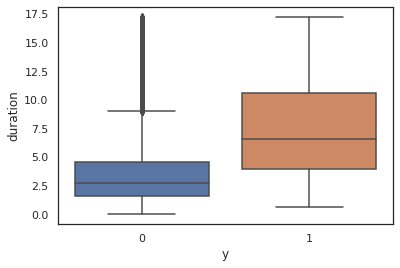

In [ ]:
sns.boxplot(x='y',y='duration',data=df_outliers_removed)

In [ ]:
# remove absolutely unrequired columns

df = df.drop(['day_of_week', 'month', 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_outliers'], axis=1)

# We will also remove 'housing' and 'loan' since we have shown that the responses do not depend on them

df = df.drop(['housing', 'loan'], axis=1)

df.head()

,age,job,marital,education,default,contact,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,telephone,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,telephone,1,999,0,nonexistent,no
2,37,services,married,high.school,no,telephone,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,telephone,1,999,0,nonexistent,no
4,56,services,married,high.school,no,telephone,1,999,0,nonexistent,no


## Dividing into first timers and old timers

In [ ]:
df_firsttime = df.loc[df['pdays'] == 999]

df_existing = df.loc[df['pdays'] != 999]


In [ ]:
print(df_firsttime.shape)
df_firsttime.head()

(39673, 11)


,age,job,marital,education,default,contact,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,telephone,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,telephone,1,999,0,nonexistent,no
2,37,services,married,high.school,no,telephone,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,telephone,1,999,0,nonexistent,no
4,56,services,married,high.school,no,telephone,1,999,0,nonexistent,no


#### First let's consider the first timers only

In [ ]:
df_firsttime = df_firsttime.drop(['pdays', 'previous', 'poutcome'], axis=1)
df_firsttime.head()

,age,job,marital,education,default,contact,campaign,y
0,56,housemaid,married,basic.4y,no,telephone,1,no
1,57,services,married,high.school,unknown,telephone,1,no
2,37,services,married,high.school,no,telephone,1,no
3,40,admin.,married,basic.6y,no,telephone,1,no
4,56,services,married,high.school,no,telephone,1,no


In [ ]:
# encoding categorical variables

df_firsttime = pd.get_dummies(df_firsttime, columns = ['job', 'marital', 'education'])
df_firsttime['default'] = df_firsttime['default'].map({'yes': 1, 'no': 0, 'unknown': 2})
df_firsttime['contact'] = df_firsttime['contact'].map({'cellular': 1, 'telephone': 0})

responses = df_firsttime['y'].map({'yes': 1, 'no': 0})
df_firsttime.drop(labels=['y'], axis=1, inplace = True)
df_firsttime.insert(28, 'y', responses)


In [ ]:
print(df_firsttime.shape)
df_firsttime.head()

(39673, 29)


,age,default,contact,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
0,56,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,57,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,37,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,40,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,56,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


##### Running a predictive classification model

In [ ]:
array = df_firsttime.values

# Features
X = array[:,0:-1]

# Target variable: 'y'
Y = array[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# use 20% set for testing

test_size= 0.20
seed = 29

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

ROC AUC: 0.500


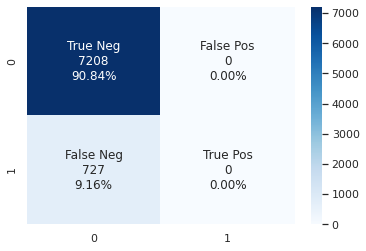

In [ ]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % auc)

ROC AUC: 0.536


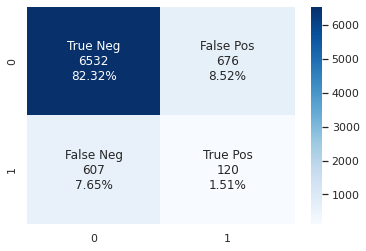

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % auc)

ROC AUC: 0.510


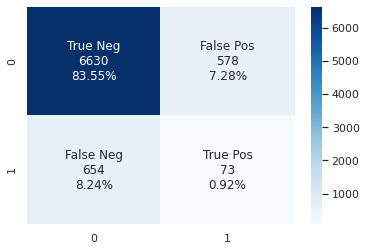

In [ ]:
#scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SC = sc.fit_transform(X_train)
X_test_SC = sc.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train_SC, y_train)

y_pred = classifier.predict(X_test_SC)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % auc)

ROC AUC: 0.528


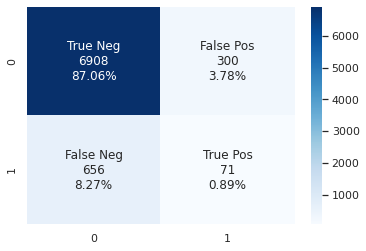

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % auc)

ROC AUC: 0.526


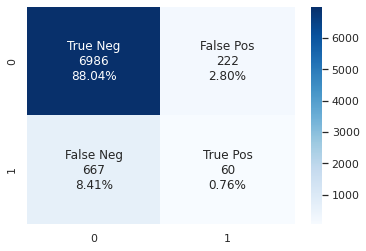

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % auc)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
s1 = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
s2 = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)


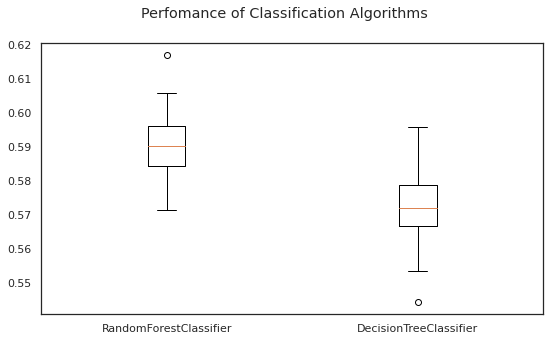

<Figure size 432x288 with 0 Axes>

In [ ]:
s = [s1,s2]
model = ['RandomForestClassifier', 'DecisionTreeClassifier']

fig = plt.figure(figsize=(9,5))
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(s)
ax.set_xticklabels(model)
plt.show()
plt.savefig("model.png")

**The low AUC numbers show that neither of these models can straightaway predict from an imbalanced dataset**

In [ ]:
## oversampling using smote
	
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_o, y_o = oversample.fit_resample(X, Y)

test_size= 0.20
seed = 29

X_train_o, X_test_o, y_train_o, y_test_o= train_test_split(X_o, y_o, test_size=test_size, random_state=seed)




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ROC AUC of test set: 0.851


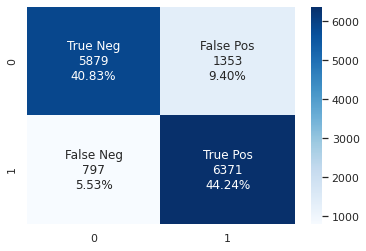

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_o, y_train_o)

# Predicting the Test set results
y_pred = classifier.predict(X_test_o)
y_train_pred = classifier.predict(X_train_o)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_o, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc_test = sklearn.metrics.roc_auc_score(y_test_o, y_pred)
print('ROC AUC of test set: %.3f' % auc_test)


**We have reached an AUC value of over 0.85, which suggests high performance**

#### Now let us apply our model to the old timers

In [ ]:
df_existing.head()

,age,job,marital,education,default,contact,campaign,pdays,previous,poutcome,y
24108,37,admin.,married,university.degree,no,telephone,1,6,1,success,no
24264,48,management,married,university.degree,no,cellular,1,4,1,success,no
24279,42,technician,married,professional.course,unknown,cellular,1,4,1,success,no
24397,50,entrepreneur,married,university.degree,unknown,cellular,1,3,1,success,no
24482,36,self-employed,single,university.degree,no,cellular,2,4,1,success,no


In [ ]:
df_existing = pd.get_dummies(df_existing, columns = ['job', 'marital', 'education'])
df_existing['default'] = df_existing['default'].map({'yes': 1, 'no': 0, 'unknown': 2})
df_existing['contact'] = df_existing['contact'].map({'cellular': 1, 'telephone': 0})
df_existing['poutcome'] = df_existing['poutcome'].map({'success': 1, 'failure': 0})

responses = df_existing['y'].map({'yes': 1, 'no': 0})
df_existing.drop(labels=['y'], axis=1, inplace = True)
df_existing.insert(31, 'y', responses)

In [ ]:
print(df_existing.shape)
df_existing.head()

(1515, 32)


,age,default,contact,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
24108,37,0,0,1,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
24264,48,0,1,1,4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
24279,42,2,1,1,4,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
24397,50,2,1,1,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
24482,36,0,1,2,4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


##### Running a predictive classification model

In [ ]:
array = df_existing.values

# Features
X = array[:,0:-1]

# Target variable: 'y'
Y = array[:,-1]

test_size= 0.20
seed = 29

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

## oversampling using smote	
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_o, y_o = oversample.fit_resample(X, Y)

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=test_size, random_state=seed)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ROC AUC of test set: 0.889


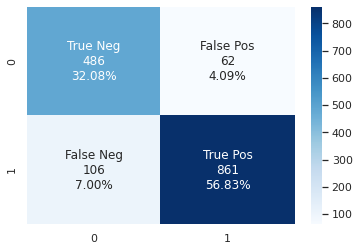

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_o, y_train_o)

# Predicting the Test set results
y_pred = classifier.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, y_pred)

# visualise cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


# calculate AUC
auc_test = sklearn.metrics.roc_auc_score(Y, y_pred)
print('ROC AUC of test set: %.3f' % auc_test)


**We have reached an AUC value of over 0.88, which suggests high performance**